## 23. OME-Zarr image registration

### OME-Zarr

[OME-Zarr](https://ngff.openmicroscopy.org/) is a cloud-optimized file format designed for storing and managing large-scale bioimaging data [1][2]. 

## Core Features

**Storage Architecture**
- Stores N-dimensional typed arrays in individually accessible chunks
- Uses JSON for metadata storage and binary data in chunk-files
- Supports up to 5 dimensions in version 0.4 (time, channel, z, y, x)

**Performance Optimization**
- Implements Google Maps-style multi-resolution pyramids for smooth zooming
- Offers configurable chunk compression using algorithms like GZIP or Blosc
- Enables efficient data access through colocated pixel storage

**Data Organization**
- Uses hierarchical Zarr "groups" to organize multiple multi-dimensional pyramids
- Allows metadata attachment at each hierarchy level using JSON files
- Supports grouping of related data (raw images, deconvolutions, segmentations)

## Spatial Metadata Support

Version 0.4 introduced significant spatial metadata capabilities:
- Supports multi-dimensional raster images with associated volumetric data
- Enables spatial transformations for dataset alignment

[1] https://www.biorxiv.org/content/10.1101/2023.02.17.528834v2.full
[2] https://pmc.ncbi.nlm.nih.gov/articles/PMC9980008/

### ngff-zarr

[ngff-zarr](https://ngff-zarr.readthedocs.io) is lean and kind OME-Zarr implementation.

## ✨ Features

- Minimal dependencies
- Work with arbitrary Zarr store types
- Lazy, parallel, and web ready -- no local filesystem required
- Process extremely large datasets
- Conversion of most bioimaging file formats
- Multiple downscaling methods
- Supports Python>=3.9
- Reads OME-Zarr v0.1 to v0.5 into simple Python data classes with Dask arrays
- Optional OME-Zarr data model validation during reading
- Writes OME-Zarr v0.4 to v0.5
- Optional writing via [tensorstore](https://google.github.io/tensorstore/)

And interoperability with [ITK's Python bindings](https://docs.itk.org/en/latest/learn/python_quick_start.html) and [ITK-Wasm](https://wasm.itk.org) that work with [itk-elastix](https://pypi.org/project/itk-elastix/) and [itkwasm-elastix](https://pypi.org/project/itkwasm-elastix/)

In this notebook, we'll register OME-Zarr images with `itk-elastix`.

In [2]:
import itk
from itkwidgets import view
import ngff_zarr as nz
from rich import print
from zarr.storage import FSStore, LRUStoreCache
import zarr
import copy
import dask.array as da
import dask

In [3]:
# From the IDR OME-NGFF Samples
image_url = 'https://uk1s3.embassy.ebi.ac.uk/idr/zarr/v0.3/idr0051A/4007817.zarr'

fs_store = FSStore(image_url)
# Least recently used cache -- avoid re-fetching timepoints
lru_store = LRUStoreCache(fs_store, max_size=1e9)
ome_zarr = nz.from_ngff_zarr(lru_store, version='0.3')

# 3D time series
print(ome_zarr)

Multiscales(
    images=[
        NgffImage(
            data=dask.array<from-zarr, shape=(79, 201, 333, 333), dtype=uint16, chunksize=(1, 1, 333, 333), 
chunktype=numpy.ndarray>,
            dims=['t', 'z', 'y', 'x'],
            scale={'t': 1.0, 'z': 1.0, 'y': 1.0, 'x': 1.0},
            translation={'t': 0.0, 'z': 0.0, 'y': 0.0, 'x': 0.0},
            name='image',
            axes_units={'t': None, 'z': None, 'y': None, 'x': None},
            computed_callbacks=[]
        ),
        NgffImage(
            data=dask.array<from-zarr, shape=(79, 201, 166, 166), dtype=uint16, chunksize=(1, 1, 166, 166), 
chunktype=numpy.ndarray>,
            dims=['t', 'z', 'y', 'x'],
            scale={'t': 1.0, 'z': 1.0, 'y': 1.0, 'x': 1.0},
            translation={'t': 0.0, 'z': 0.0, 'y': 0.0, 'x': 0.0},
            name='image',
            axes_units={'t': None, 'z': None, 'y': None, 'x': None},
            computed_callbacks=[]
        ),
        NgffImage(
            data=dask.array<from-zarr, shape=(79, 201, 83, 83), dtype=uint16, chunksize=(1, 1, 83, 83), 
chunktype=numpy.ndarray>,
            dims=['t', 'z', 'y', 'x'],
            scale={'t': 1.0, 'z': 1.0, 'y': 1.0, 'x': 1.0},
            translation={'t': 0.0, 'z': 0.0, 'y': 0.0, 'x': 0.0},
            name='image',
            axes_units={'t': None, 'z': None, 'y': None, 'x': None},
            computed_callbacks=[]
        )
    ],
    metadata=Metadata(
        axes=[
            Axis(name='t', type='time', unit=None),
            Axis(name='z', type='space', unit=None),
            Axis(name='y', type='space', unit=None),
            Axis(name='x', type='space', unit=None)
        ],
        datasets=[
            Dataset(path='0', coordinateTransformations=[]),
            Dataset(path='1', coordinateTransformations=[]),
            Dataset(path='2', coordinateTransformations=[])
        ],
        coordinateTransformations=None,
        omero=Omero(
            channels=[
                OmeroChannel(color='808080', window=OmeroWindow(min=0.0, max=65535.0, start=200.0, end=1500.0))
            ]
        ),
        name='image',
        version='0.3'
    ),
    scale_factors=None,
    method=None,
    chunks=None
)

In [4]:
# Working with the first scale
ngff_image = ome_zarr.images[0]

# For visualization
vmin = ome_zarr.metadata.omero.channels[0].window.start
vmax = ome_zarr.metadata.omero.channels[0].window.end

print(ngff_image)

NgffImage(
    data=dask.array<from-zarr, shape=(79, 201, 333, 333), dtype=uint16, chunksize=(1, 1, 333, 333), 
chunktype=numpy.ndarray>,
    dims=['t', 'z', 'y', 'x'],
    scale={'t': 1.0, 'z': 1.0, 'y': 1.0, 'x': 1.0},
    translation={'t': 0.0, 'z': 0.0, 'y': 0.0, 'x': 0.0},
    name='image',
    axes_units={'t': None, 'z': None, 'y': None, 'x': None},
    computed_callbacks=[]
)


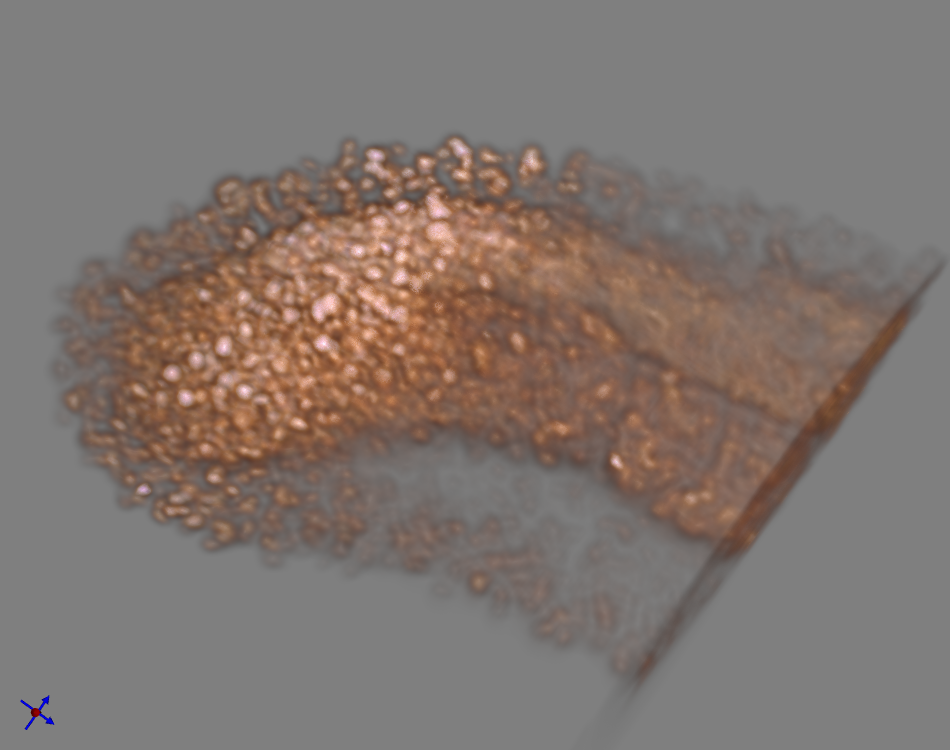
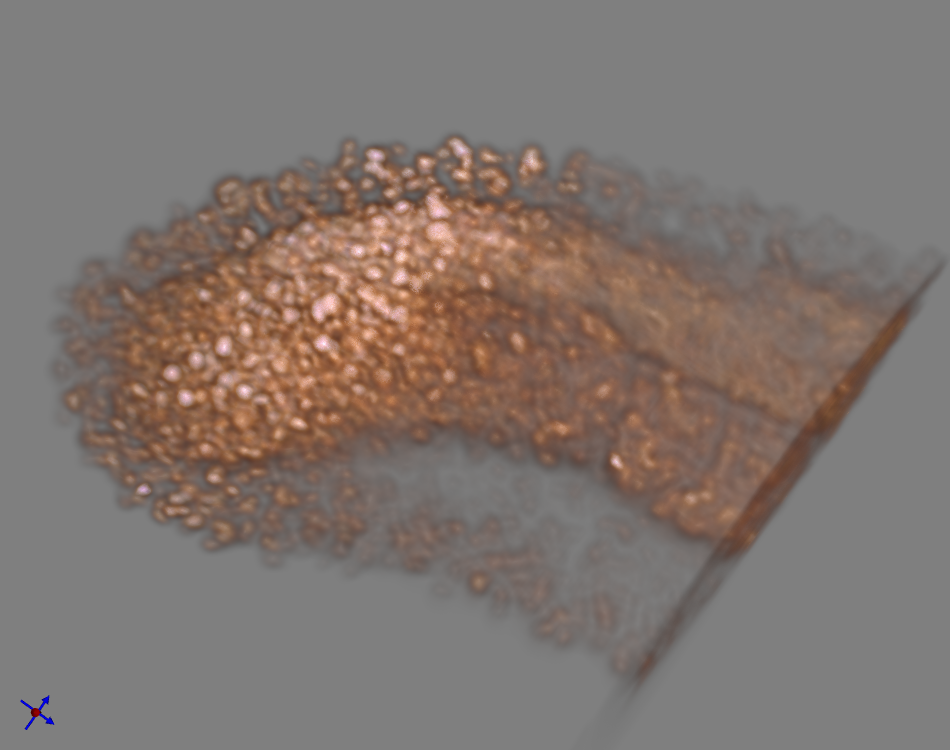

<IPython.core.display.Javascript object>

In [5]:
fixed_image = nz.ngff_image_to_itk_image(ngff_image, wasm=False, t_index=0)
view(fixed_image, vmin=vmin, vmax=vmax)


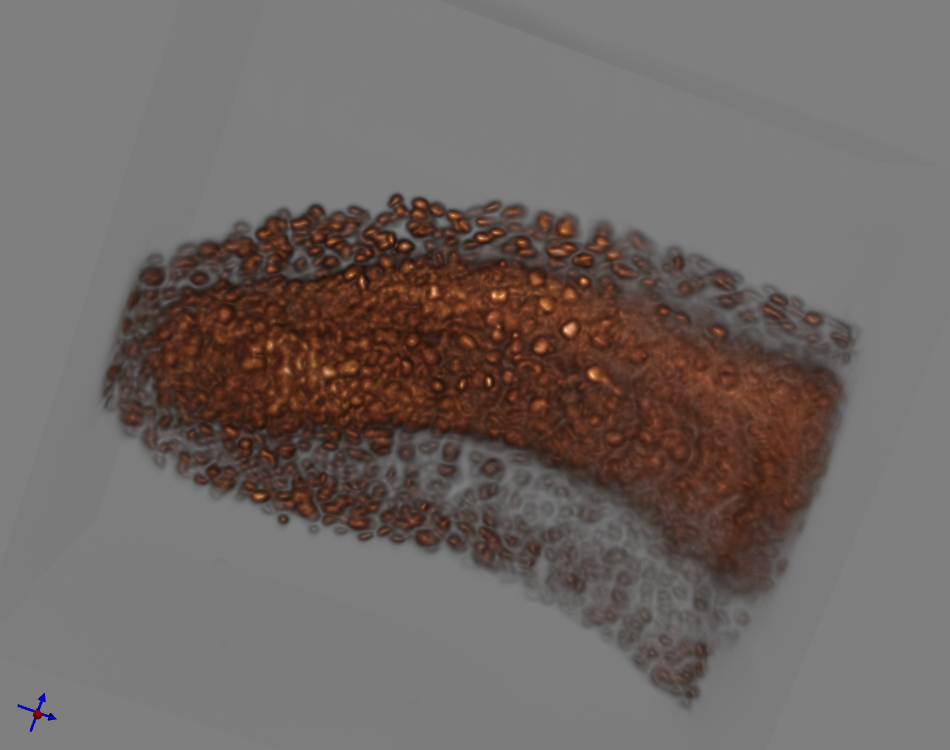
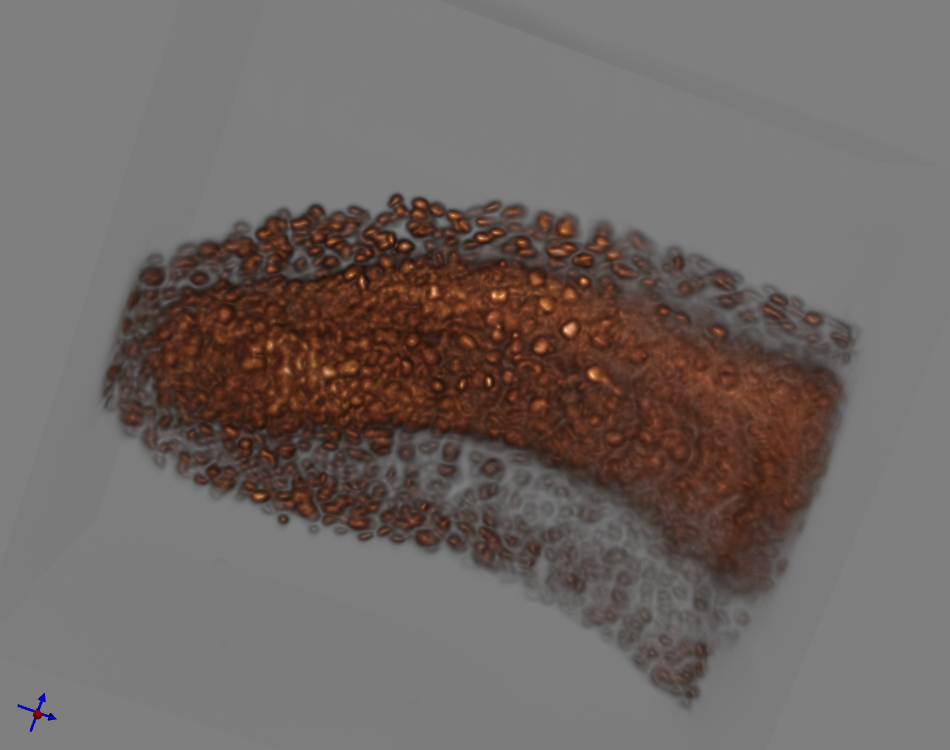

<IPython.core.display.Javascript object>

In [9]:
moving_image = nz.ngff_image_to_itk_image(ngff_image, wasm=False, t_index=50)
view(moving_image, vmin=vmin, vmax=vmax)

The function calls in the 3D case to import and register the images is similar to the 2D case. Masks, usually binary images, are import with the itk library similar to the images.  

### Registration

Any of the registration interfaces described in the other notebooks in the repository can be used.


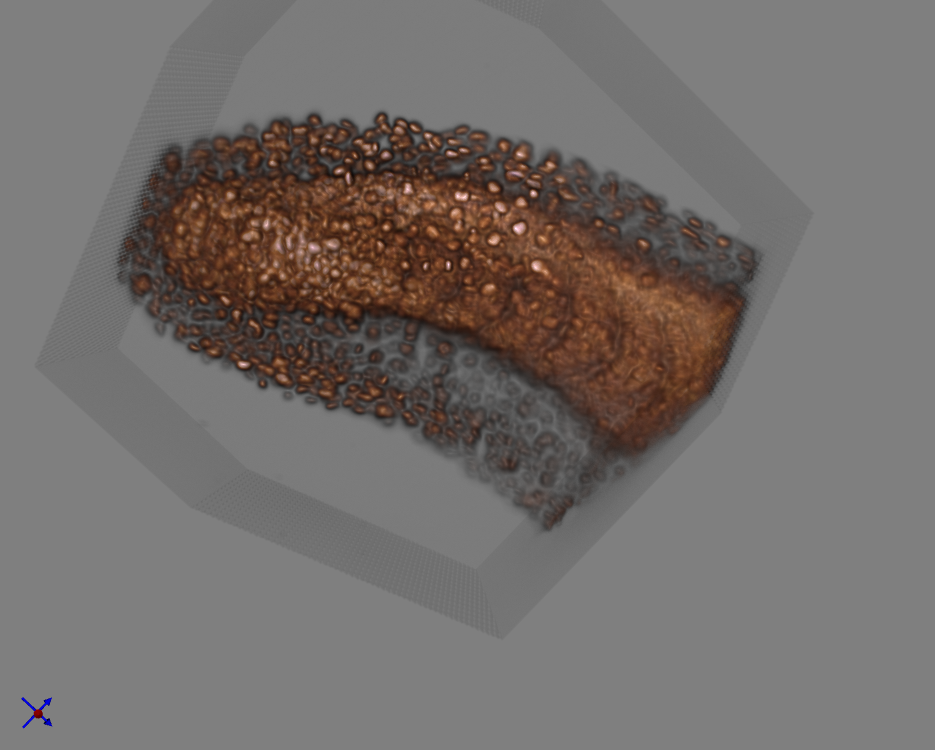
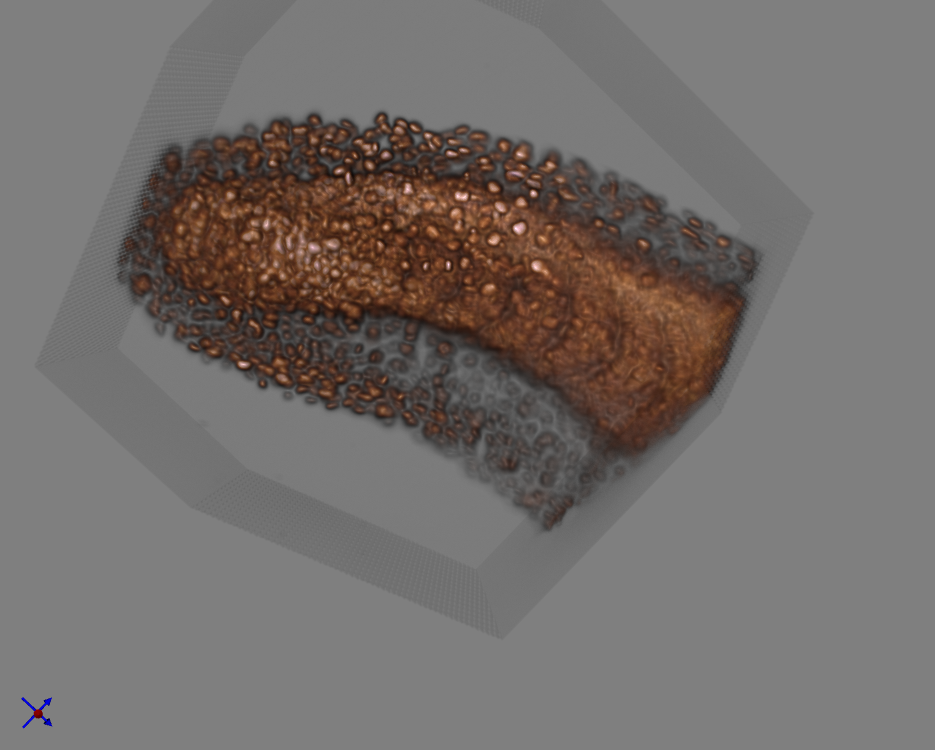

<IPython.core.display.Javascript object>

In [7]:
parameter_object = itk.ParameterObject.New()
resolutions = 3
parameter_map_rigid = parameter_object.GetDefaultParameterMap('rigid', resolutions)
parameter_object.AddParameterMap(parameter_map_rigid)

result_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image, moving_image,
    parameter_object=parameter_object)

view(result_image)

Write the result to disk as an OME-Zarr.

In [8]:
result_ngff = nz.itk_image_to_ngff_image(result_image)
result_ngff.axes_units = ome_zarr.metadata.axes[0].unit

result_multiscales = nz.to_multiscales(result_image)
result_multiscales.metadata.omero = ome_zarr.metadata.omero

nz.to_ngff_zarr('result.ome.zarr', result_multiscales)